In [1]:
%pylab inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [3]:
train_1 = pd.read_csv('../data/train_1.csv')
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
print 'train_1 has {0} pages, {1} time features'.format(train_1.shape[0], train_1.shape[1]-1)

train_1 has 145063 pages, 550 time features


In [7]:
empty_sample = train_1[train_1.isnull().any(axis=1)]
print("Number of records contain 1+ null: ", empty_sample.shape[0])

('Number of records contain 1+ null: ', 27786)


In [9]:
all_null_sample = train_1[train_1.iloc[:,1:].isnull().all(axis=1)]
print("Number of records all null: ", all_null_sample.shape[0])

('Number of records all null: ', 652)


训练数据中有 null 的记录共 27786 条，全部是 null 的记录 652 条，可见对缺失值的处理是非常重要的，除非预测模型具有处理 null 的能力。
pandas 提供了对缺失值的处理，比如前向填充（fillna(method='pad')）、后向填充（fillna(method='bfill')）、填充0等等，具体情况要分别对待。

接下来对数据进行可视化，看看它们的时间规律如何。

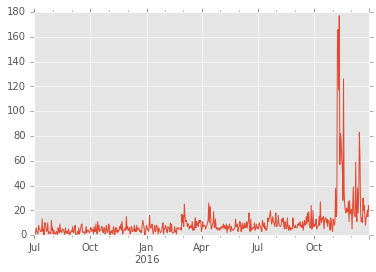

In [11]:
# 用 Series plot 作图
page_row = train_1[train_1['Page'] == '伊万卡·特朗普_zh.wikipedia.org_all-access_spider']
ts = pd.Series(page_row.values[0][1:], index = pd.date_range('7/1/2015', '12/31/2016'))
ts.plot()

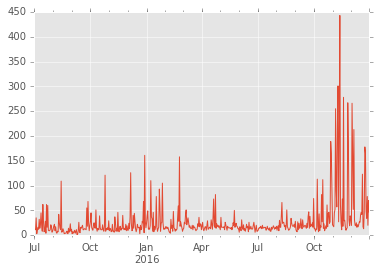

In [13]:
page_she = train_1[train_1['Page'] == 'S.H.E_zh.wikipedia.org_all-access_spider']
ts_she = pd.Series(page_she.values[0][1:], index = pd.date_range('7/1/2015', '12/31/2016'))
ts_she.plot()

从上面的图中可以看出，网页点击量通常有周期性，但是需要注意的是，它往往也有一定的突发性，与某些特定的事件或特定时间相关，所以需要模型足够强壮以适应这些突变。

需要注意，最后的准确率使用 SMAPE(Symmetric mean absolute percentage error)衡量，下面是计算公式， At 是真实值，Ft 是预测值， t 是每一个拟合点
<img src='http://7xub54.com1.z0.glb.clouddn.com/smape.png'>